In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 10)
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
# plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

## 1 读取数据

In [3]:

df=pd.read_excel(r'F:\For2git\udacity20180728\bjlianjia.xlsx',0,header=None)
# sheet_name=0  sheet1
# header=None  无表头


In [4]:
# 添加列名

columns = ["房型","成交时间","地址","价格","朝向","装修","建造年代","楼层","产权","面积","得房面积","是否有钥匙","编号"]
df.columns = columns

In [5]:
df.head(10)

,房型,成交时间,地址,价格,朝向,装修,建造年代,楼层,产权,面积,得房面积,是否有钥匙,编号
0,3室1厅1厨1卫,2016.08.30 链家成交,人定湖北巷,750.0,东南 北,简装,1984,中楼层 (共6层),70年,77.5㎡,暂无数据,无,101100406614
1,2室1厅1厨1卫,2016.07.31 链家成交,刘家窑东里,343.0,南 西,精装,1998,高楼层 (共18层),70年,75㎡,暂无数据,有,101091748516
2,3室1厅1厨1卫,2017.02.17 链家成交,兰园,640.0,南 北,简装,1998,中楼层 (共6层),70年,88.1㎡,暂无数据,无,101101151051
3,2室1厅1厨1卫,2017.02 其他公司成交,科育小区,NaN,南 北,精装,1975,顶层 (共4层),70年,66.69㎡,50.03㎡,无,101100278245
4,3室1厅1厨1卫,2016.09.15 链家成交,中纺宿舍,925.0,东南,简装,未知,低楼层 (共18层),70年,108.86㎡,暂无数据,有,101100449527
5,2室1厅1厨1卫,2017.07.07 链家成交,万寿寺北里,681.0,东南 北,精装,1997,中楼层 (共5层),70年,69.4㎡,46.9㎡,无,101101651035
6,2室1厅1厨1卫,2017.03.08 链家成交,团结湖北二条,430.0,南 北,简装,1981,顶层 (共6层),70年,61.75㎡,暂无数据,无,101101061774
7,3室1厅1厨1卫,2016.12.17 链家成交,农科院,753.0,南 北,其他,1992,顶层 (共6层),70年,76.2㎡,暂无数据,无,101100824003
8,3室1厅1厨1卫,2016.08.18 链家成交,东棉花胡同,650.0,东 西,简装,1986,低楼层 (共6层),70年,69.19㎡,暂无数据,无,101092123452
9,2室1厅1厨1卫,2016.07.29 链家成交,安德路乙61号院,470.0,东南,精装,1989,中楼层 (共14层),70年,64.32㎡,暂无数据,有,101100308672


In [6]:
df.dtypes  # 获取每列的数据类型，方便后续进行数据处理

房型        object
成交时间      object
地址        object
价格       float64
朝向        object
装修        object
建造年代      object
楼层        object
产权        object
面积        object
得房面积      object
是否有钥匙     object
编号        object
dtype: object

## 2 数据处理

In [5]:
df['房型'].value_counts()  # 查看每个房型的数量

# 通过异常处理的方式，统一处理特殊值
# 将房型整理为数值
def parseHouse(s):
    try:
        s=s.strip()
        r=[]
        if len(s)==8:
            r.append(s[0])
            r.append(s[2])
            r.append(s[4])
            r.append(s[6])
        else:
            r=[-1,-1,-1,-1]
    except:
        r=[-1,-1,-1,-1]
    return r

room_df=pd.DataFrame(df['房型'].apply(lambda s:parseHouse(s)).values.tolist(),columns=['室','厅','厨','卫'])
room_df.replace('-',-1,inplace=True)  # inplace的作用：是否在原df上进行修改


# 这里获得的房型数据是新数据  room_df

In [6]:
# 成交时间处理
import re

def parseDate(s):
    try:
        return re.findall(r'[\d\.]+',s)[0]
    
    except:
        return '-1.-1.-1'

date_df=df['成交时间'].apply(lambda s:parseDate(s))
date_df=pd.DataFrame(date_df.apply(lambda s:s.split('.')).values.tolist(),columns=['年','月','日'])

date_df.fillna(-1,inplace=True)

# 成交日期处理为date_df，拆分为三列


In [7]:
# 朝向处理

def parseCX(s):
    try:
        s=s.strip()
        return s.split(' ')
    except:
        return ['unknown']

# 列表数据----清洗不彻底
cx_data=df['朝向'].apply(lambda s:parseCX(s)).values.tolist()



In [8]:
# 面积与产权年代处理

def parseArea(s):
    try:
        return re.findall(r'[\d\.]+',s)[0]
    except:
        return '-1'

area_data=df['面积'].apply(lambda s:parseArea(s))
property_data=df['产权'].apply(lambda s:parseArea(s))

## 数据分析展示

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


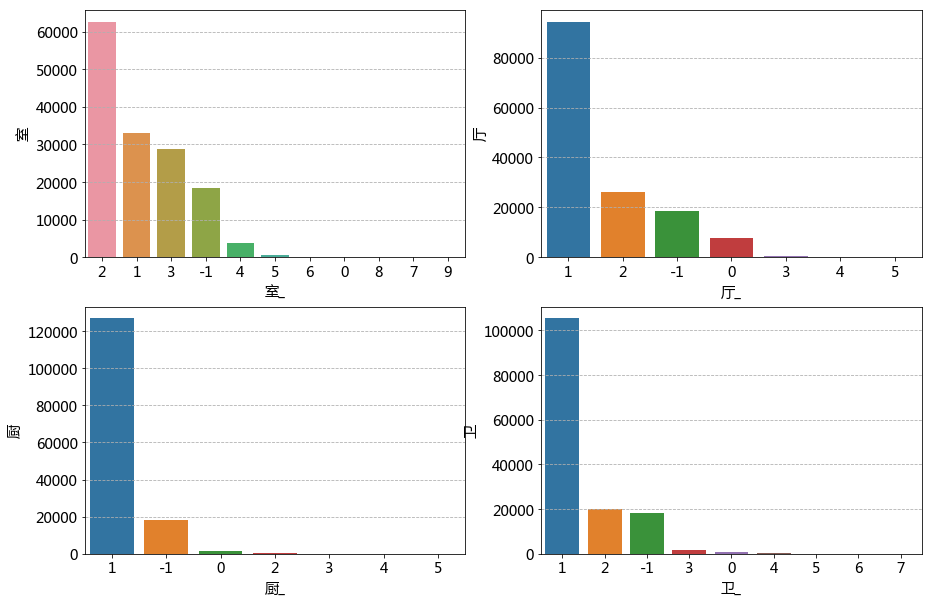

In [9]:
# 房型探索
# plt.rcParams['figure.figsize']=(15,10)

fig,axes=plt.subplots(2,2,figsize=(15,10))

# 将数组或矩阵转为一维
ax0,ax1,ax2,ax3=axes.flatten()

# 遍历方式绘图
# reset_index()将index变为新列
# rename(columns={,})给某列重命名
# seaborn绘图

for ax,col in zip(axes.flatten(),room_df.columns):
    temp=room_df[col].value_counts().reset_index().rename(columns={'index':col+'_'})
    sns.barplot(x=col+'_',y=col,data=temp,ax=ax)



D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


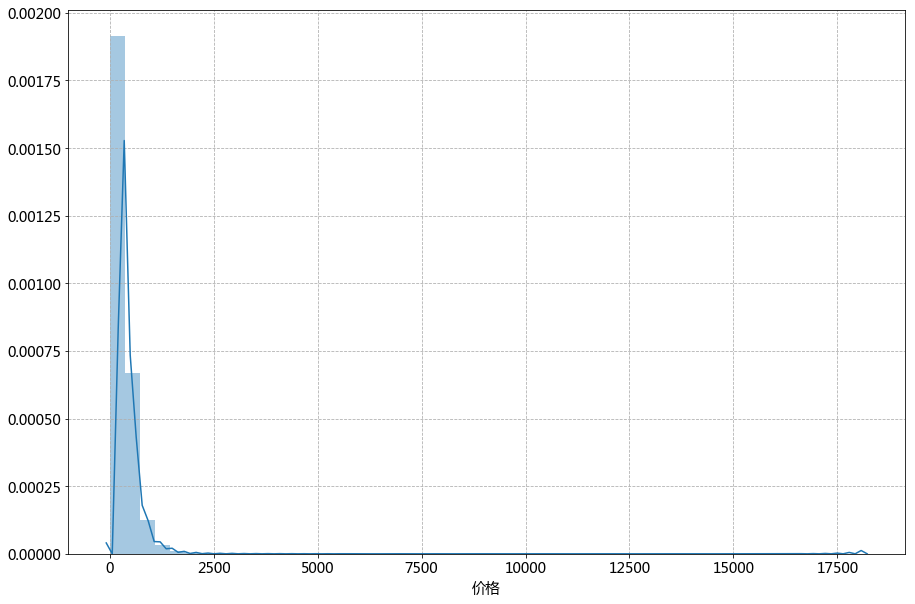

In [10]:
# 成交价格的集中趋势
fig=plt.figure(figsize=(15,10))
sns.distplot(df['价格'].fillna(0))
 


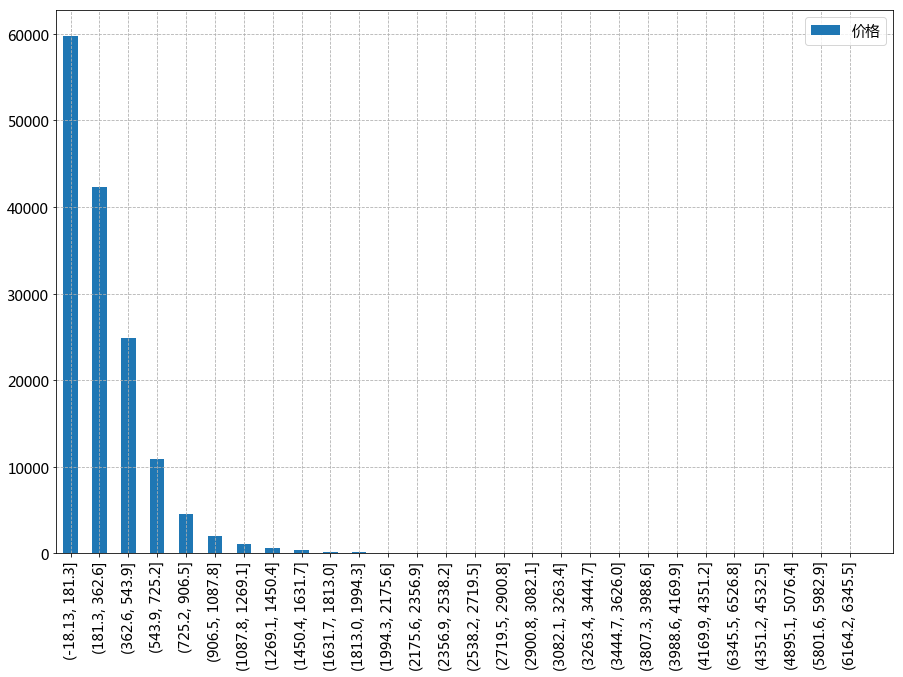

In [14]:
# 对连续特征离散化，查看更直接

# cut()对数据进行分组
cut_price=pd.cut(df['价格'].fillna(0),bins=100).value_counts()
# 筛掉0值，转换为DF
cut_price=cut_price[cut_price>0].reset_index()

cut_price.plot.bar(figsize=(15,10))
temp=plt.xticks(range(28),cut_price['index'].values,rotation=90)


D:\Anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


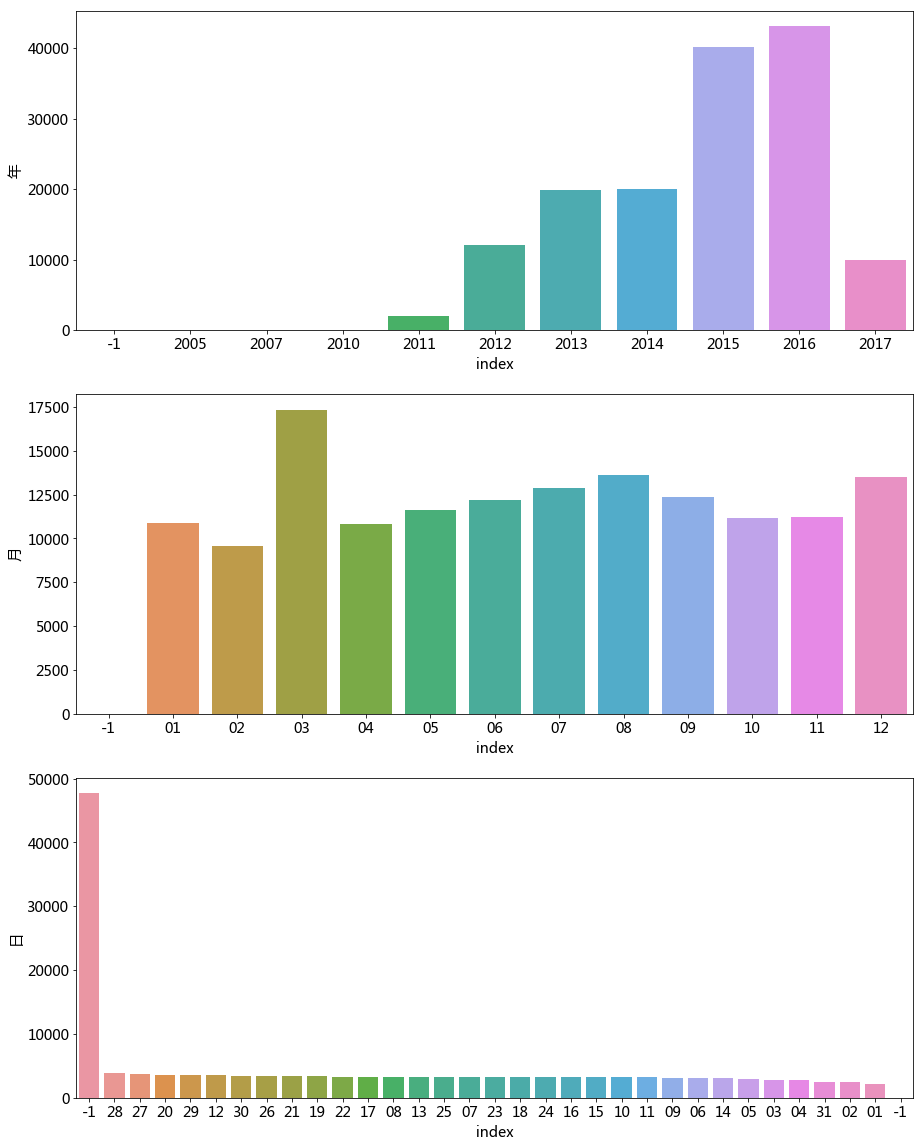

In [14]:
# 成交时间的趋势

fig,axes=plt.subplots(3,1,figsize=(15,20))

for i,col in enumerate(date_df.columns):
    temp_data=date_df[col].value_counts().reset_index()
    sns.barplot(x='index',y=col,data=temp_data,ax=axes[i])
# date_df

In [15]:
type(area_data[0])

str

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


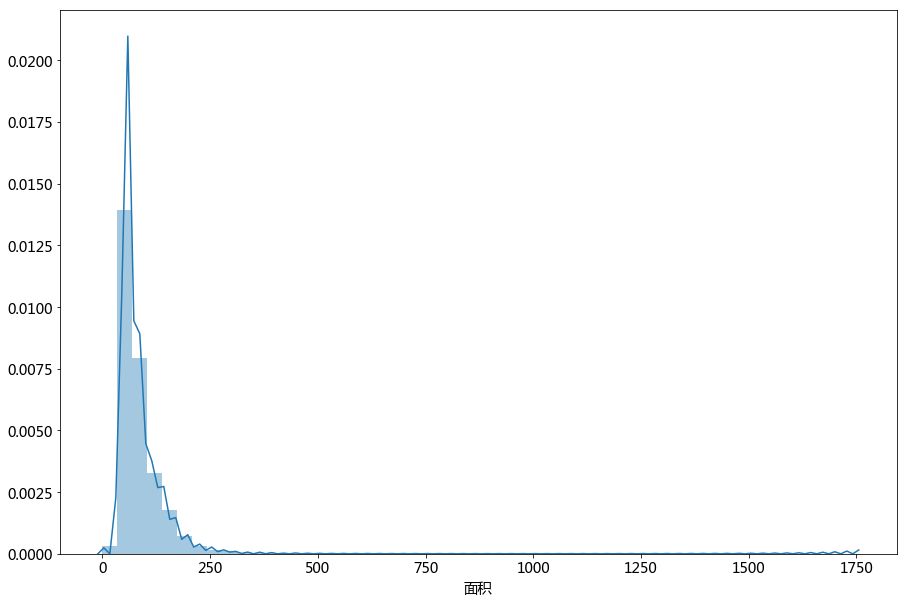

In [16]:
# 房屋面积

# 数据类型转换
area_data=area_data.astype('float16')

fig=plt.figure(figsize=(15,10))
sns.distplot(area_data)


D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


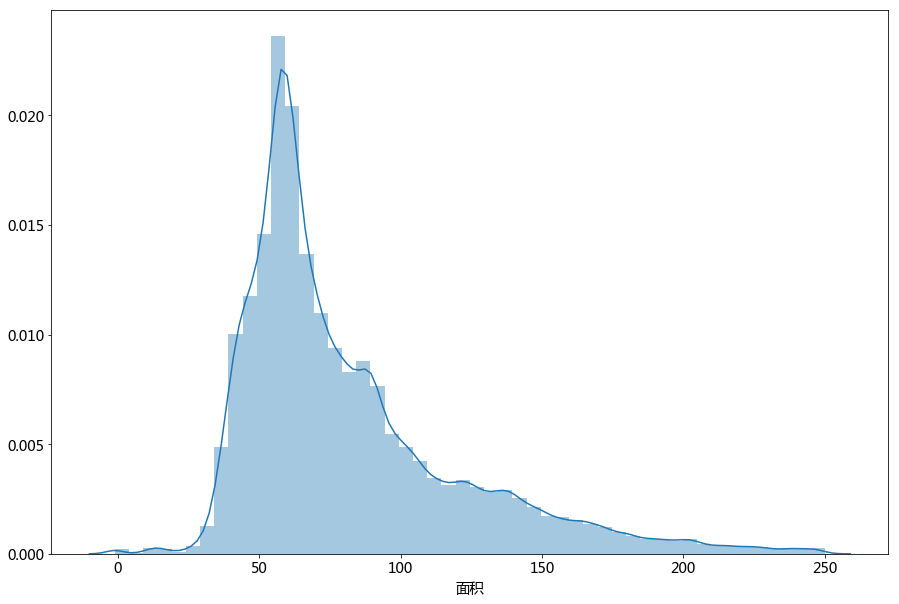

In [24]:
# 筛选出常规数据进行分析

area=area_data[area_data<=250]

sns.distplot(area)

Text(0,0.5,'价格')

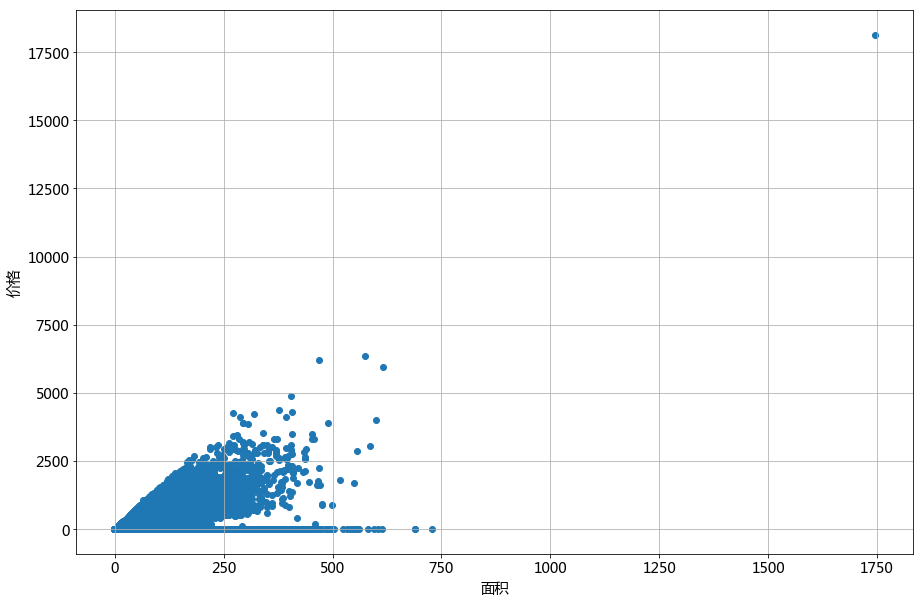

In [31]:
# 面积与价格的关系

plt.scatter(area_data,df['价格'].fillna(0))

plt.grid()
plt.xlabel('面积')
plt.ylabel('价格')


D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


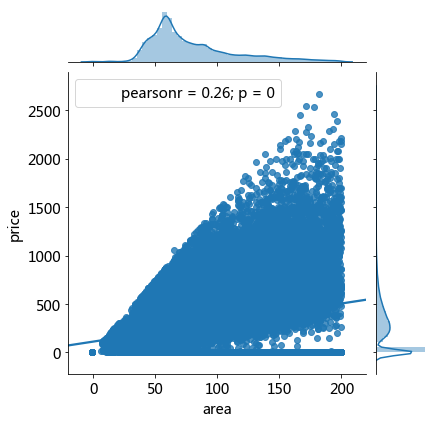

In [36]:
# 分析面积与价格的相关性

# 聚合 面积与价格
area_price = pd.DataFrame(list(zip(area_data.values,df['价格'].fillna(0).values)),columns = ['area','price'])

area_price_200=area_price[area_price['area']<=200]

sns.jointplot(x='area',y='price',data=area_price_200,kind='reg')


(array([  9.41000000e+02,   3.24800000e+03,   6.03500000e+03,
          1.57940000e+04,   1.43290000e+04,   1.44610000e+04,
          1.07580000e+04,   1.37620000e+04,   7.09500000e+03,
          7.57500000e+03,   8.02500000e+03,   1.14080000e+04,
          6.68000000e+03,   6.01500000e+03,   4.76400000e+03,
          5.54900000e+03,   1.47400000e+03,   6.69000000e+02,
          5.30000000e+02,   2.01000000e+02,   2.49000000e+02,
          2.08000000e+02,   3.44000000e+02,   1.44000000e+02,
          2.24000000e+02,   2.31000000e+02,   2.16000000e+02,
          5.50000000e+01,   1.40000000e+01,   1.00000000e+01]),
 array([  0.        ,   2.26666667,   4.53333333,   6.8       ,
          9.06666667,  11.33333333,  13.6       ,  15.86666667,
         18.13333333,  20.4       ,  22.66666667,  24.93333333,
         27.2       ,  29.46666667,  31.73333333,  34.        ,
         36.26666667,  38.53333333,  40.8       ,  43.06666667,
         45.33333333,  47.6       ,  49.86666667,  52.1333

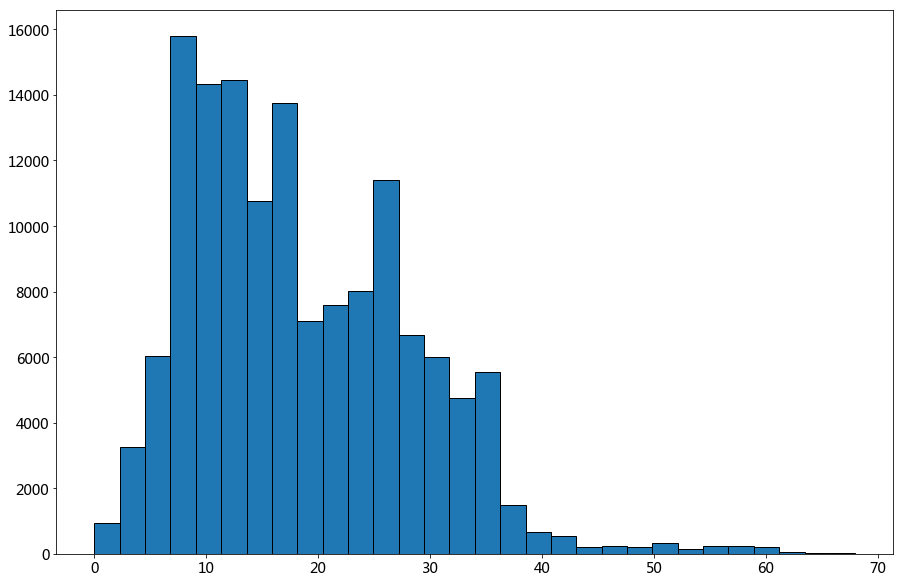

In [56]:
# 分析房子的年份

# 处理建造年份
built_year=df['建造年代'].apply(lambda s:str(s).strip()).replace({'未知':-1}).fillna(-1).astype('float16')

# 获取房子的年份
diff_year = date_df['年'].astype("float16") - built_year
diff_year=diff_year[(diff_year>=0)&(diff_year<70)]

plt.hist(diff_year.values,bins=30,edgecolor='k')

In [ ]:
# 作业

def _analysisData(df):
    """
    1. 成交价格的集中趋势
    2. 价格的百分位数
    3. 成交交时间的趋势
    4. 成交面积的趋势
    5. 房龄年限趋势
    6. 房型结构
    
    """



In [67]:
area_data.values

array([  77.5    ,   75.     ,   88.125  , ...,  146.     ,   57.21875,
        116.9375 ], dtype=float16)